In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)
pdata = pd.read_csv('../data/diabetes.csv')
#the dataset can be analysed using the standard head() command
pdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
               'BMI']
def check_zero_entries(data, fields):
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, 
               len(data.loc[ data[field] == 0, 
               field ])))


In [4]:
from sklearn.model_selection import train_test_split
features = list(pdata.columns.values)
features.remove('Outcome')
print(features)
X = pdata[features]
y = pdata['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
     test_size=0.25, random_state=0)
print(X_train.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(576, 8)


In [5]:
def impute_zero_field(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])   # num of 0-entries
    data.loc[ data[field] == 0, field ] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))  

In [6]:
for field in zero_fields:
    impute_zero_field(X_train, field)
    
# Fix for Test dataset
for field in zero_fields:
    impute_zero_field(X_test, field)

Field: Glucose; fixed 4 entries with value: 122.003
Field: BloodPressure; fixed 25 entries with value: 72.846
Field: SkinThickness; fixed 163 entries with value: 29.465
Field: Insulin; fixed 270 entries with value: 158.464
Field: BMI; fixed 8 entries with value: 32.663
Field: Glucose; fixed 1 entries with value: 120.738
Field: BloodPressure; fixed 10 entries with value: 71.071
Field: SkinThickness; fixed 64 entries with value: 28.148
Field: Insulin; fixed 104 entries with value: 145.409
Field: BMI; fixed 3 entries with value: 31.841


/Users/rdua/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [8]:
EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 16
## Create our model
model = Sequential()
# 1st layer: input_dim=8, 12 nodes, RELU
#model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

In [13]:
# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [14]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)



Epoch 00001: val_accuracy improved from -inf to 0.60417, saving model to pima-weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.60417 to 0.63021, saving model to pima-weights.best.hdf5

Epoch 00003: val_accuracy improved from 0.63021 to 0.63542, saving model to pima-weights.best.hdf5

Epoch 00004: val_accuracy improved from 0.63542 to 0.65625, saving model to pima-weights.best.hdf5

Epoch 00005: val_accuracy did not improve from 0.65625

Epoch 00006: val_accuracy did not improve from 0.65625

Epoch 00007: val_accuracy did not improve from 0.65625

Epoch 00008: val_accuracy improved from 0.65625 to 0.68750, saving model to pima-weights.best.hdf5

Epoch 00009: val_accuracy did not improve from 0.68750

Epoch 00010: val_accuracy did not improve from 0.68750

Epoch 00011: val_accuracy did not improve from 0.68750

Epoch 00012: val_accuracy did not improve from 0.68750

Epoch 00013: val_accuracy did not improve from 0.68750

Epoch 00014: val_accuracy did not improve from 0.68750


Epoch 00143: val_accuracy did not improve from 0.73958

Epoch 00144: val_accuracy did not improve from 0.73958

Epoch 00145: val_accuracy did not improve from 0.73958

Epoch 00146: val_accuracy did not improve from 0.73958

Epoch 00147: val_accuracy did not improve from 0.73958

Epoch 00148: val_accuracy did not improve from 0.73958

Epoch 00149: val_accuracy did not improve from 0.73958

Epoch 00150: val_accuracy did not improve from 0.73958

Epoch 00151: val_accuracy did not improve from 0.73958

Epoch 00152: val_accuracy did not improve from 0.73958

Epoch 00153: val_accuracy did not improve from 0.73958

Epoch 00154: val_accuracy did not improve from 0.73958

Epoch 00155: val_accuracy did not improve from 0.73958

Epoch 00156: val_accuracy did not improve from 0.73958

Epoch 00157: val_accuracy did not improve from 0.73958

Epoch 00158: val_accuracy did not improve from 0.73958

Epoch 00159: val_accuracy did not improve from 0.73958

Epoch 00160: val_accuracy did not improve from 


Epoch 00287: val_accuracy did not improve from 0.76562

Epoch 00288: val_accuracy did not improve from 0.76562

Epoch 00289: val_accuracy did not improve from 0.76562

Epoch 00290: val_accuracy did not improve from 0.76562

Epoch 00291: val_accuracy did not improve from 0.76562

Epoch 00292: val_accuracy did not improve from 0.76562

Epoch 00293: val_accuracy did not improve from 0.76562

Epoch 00294: val_accuracy did not improve from 0.76562

Epoch 00295: val_accuracy did not improve from 0.76562

Epoch 00296: val_accuracy did not improve from 0.76562

Epoch 00297: val_accuracy did not improve from 0.76562

Epoch 00298: val_accuracy did not improve from 0.76562

Epoch 00299: val_accuracy did not improve from 0.76562

Epoch 00300: val_accuracy did not improve from 0.76562

Epoch 00301: val_accuracy did not improve from 0.76562

Epoch 00302: val_accuracy did not improve from 0.76562

Epoch 00303: val_accuracy did not improve from 0.76562

Epoch 00304: val_accuracy did not improve from 


Epoch 00433: val_accuracy did not improve from 0.77083

Epoch 00434: val_accuracy did not improve from 0.77083

Epoch 00435: val_accuracy did not improve from 0.77083

Epoch 00436: val_accuracy did not improve from 0.77083

Epoch 00437: val_accuracy did not improve from 0.77083

Epoch 00438: val_accuracy did not improve from 0.77083

Epoch 00439: val_accuracy did not improve from 0.77083

Epoch 00440: val_accuracy did not improve from 0.77083

Epoch 00441: val_accuracy did not improve from 0.77083

Epoch 00442: val_accuracy did not improve from 0.77083

Epoch 00443: val_accuracy did not improve from 0.77083

Epoch 00444: val_accuracy did not improve from 0.77083

Epoch 00445: val_accuracy did not improve from 0.77083

Epoch 00446: val_accuracy did not improve from 0.77083

Epoch 00447: val_accuracy did not improve from 0.77083

Epoch 00448: val_accuracy did not improve from 0.77083

Epoch 00449: val_accuracy did not improve from 0.77083

Epoch 00450: val_accuracy did not improve from 


Epoch 00580: val_accuracy did not improve from 0.77083

Epoch 00581: val_accuracy did not improve from 0.77083

Epoch 00582: val_accuracy did not improve from 0.77083

Epoch 00583: val_accuracy did not improve from 0.77083

Epoch 00584: val_accuracy did not improve from 0.77083

Epoch 00585: val_accuracy did not improve from 0.77083

Epoch 00586: val_accuracy did not improve from 0.77083

Epoch 00587: val_accuracy did not improve from 0.77083

Epoch 00588: val_accuracy did not improve from 0.77083

Epoch 00589: val_accuracy did not improve from 0.77083

Epoch 00590: val_accuracy did not improve from 0.77083

Epoch 00591: val_accuracy did not improve from 0.77083

Epoch 00592: val_accuracy did not improve from 0.77083

Epoch 00593: val_accuracy did not improve from 0.77083

Epoch 00594: val_accuracy did not improve from 0.77083

Epoch 00595: val_accuracy did not improve from 0.77083

Epoch 00596: val_accuracy did not improve from 0.77083

Epoch 00597: val_accuracy did not improve from 


Epoch 00731: val_accuracy did not improve from 0.77083

Epoch 00732: val_accuracy did not improve from 0.77083

Epoch 00733: val_accuracy did not improve from 0.77083

Epoch 00734: val_accuracy did not improve from 0.77083

Epoch 00735: val_accuracy did not improve from 0.77083

Epoch 00736: val_accuracy did not improve from 0.77083

Epoch 00737: val_accuracy did not improve from 0.77083

Epoch 00738: val_accuracy did not improve from 0.77083

Epoch 00739: val_accuracy did not improve from 0.77083

Epoch 00740: val_accuracy did not improve from 0.77083

Epoch 00741: val_accuracy did not improve from 0.77083

Epoch 00742: val_accuracy did not improve from 0.77083

Epoch 00743: val_accuracy did not improve from 0.77083

Epoch 00744: val_accuracy did not improve from 0.77083

Epoch 00745: val_accuracy did not improve from 0.77083

Epoch 00746: val_accuracy did not improve from 0.77083

Epoch 00747: val_accuracy did not improve from 0.77083

Epoch 00748: val_accuracy did not improve from 


Epoch 00878: val_accuracy did not improve from 0.77083

Epoch 00879: val_accuracy did not improve from 0.77083

Epoch 00880: val_accuracy did not improve from 0.77083

Epoch 00881: val_accuracy did not improve from 0.77083

Epoch 00882: val_accuracy did not improve from 0.77083

Epoch 00883: val_accuracy did not improve from 0.77083

Epoch 00884: val_accuracy did not improve from 0.77083

Epoch 00885: val_accuracy did not improve from 0.77083

Epoch 00886: val_accuracy did not improve from 0.77083

Epoch 00887: val_accuracy did not improve from 0.77083

Epoch 00888: val_accuracy did not improve from 0.77083

Epoch 00889: val_accuracy did not improve from 0.77083

Epoch 00890: val_accuracy did not improve from 0.77083

Epoch 00891: val_accuracy did not improve from 0.77083

Epoch 00892: val_accuracy did not improve from 0.77083

Epoch 00893: val_accuracy did not improve from 0.77083

Epoch 00894: val_accuracy did not improve from 0.77083

Epoch 00895: val_accuracy did not improve from 

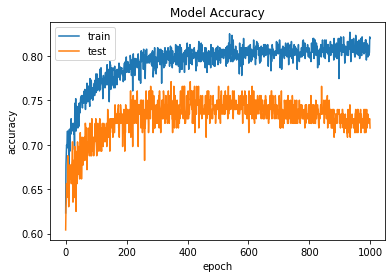

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

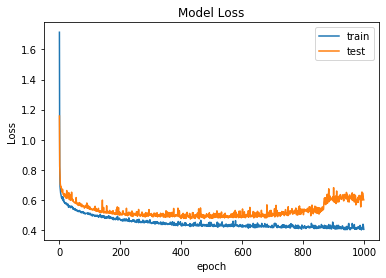

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [32]:
loss_200 = history.history['loss'][10:1000]
val_loss_200=loss = history.history['val_loss'][10:1000]

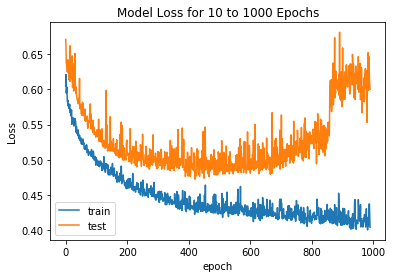

In [34]:
plt.plot(loss_200)
plt.plot(val_loss_200)
plt.title('Model Loss for 10 to 1000 Epochs')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()